In [7]:
import os 
os.chdir(r'D:\churn prediction')

In [8]:
import pandas as pd
from src.preprocessing import preprocessing_pipeline
from src.training_model import train_model_pipeline
from src.metrics import metrics_evaluation,validation_evalution
import xgboost

In [9]:
train = pd.read_csv(r'D:\churn prediction\data\fe_train.csv')
test =  pd.read_csv(r'D:\churn prediction\data\fe_test.csv')

In [10]:
X_train = train.drop(columns='Churn')
y_train = train['Churn']

X_test = test.drop(columns='Churn')
y_test = test['Churn']

In [24]:
X_train.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Total charges,State group churn
0,128,415,No,Yes,25,110,99,244.7,91,10.0,3,1,75.56,3
1,107,415,No,Yes,26,123,103,254.4,103,13.7,3,1,59.24,3
2,137,415,No,No,0,114,110,162.6,104,12.2,5,0,62.29,3
3,84,408,Yes,No,0,71,88,196.9,89,6.6,7,2,66.80,3
4,75,415,Yes,No,0,113,122,186.9,121,10.1,3,3,52.09,2


In [11]:
num_cols = X_train.select_dtypes([int,float]).columns
cat_cols = X_train.select_dtypes([object]).columns
tnf = preprocessing_pipeline(num_cols,cat_cols)

In [12]:
xgb = xgboost.XGBClassifier(max_depth=3,eta=0.09,scale_pos_weight=4.5,n_estimators=100,random_state=42)
xgb_model = train_model_pipeline(xgb,tnf,X_train,y_train)

In [22]:
from sklearn.metrics import classification_report
pred= xgb_model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99       572
        True       0.99      0.87      0.93        95

    accuracy                           0.98       667
   macro avg       0.98      0.94      0.96       667
weighted avg       0.98      0.98      0.98       667



Train metrics
recall: 0.863
precision:0.991
 
Test metrics
recall: 0.874
precision:0.988


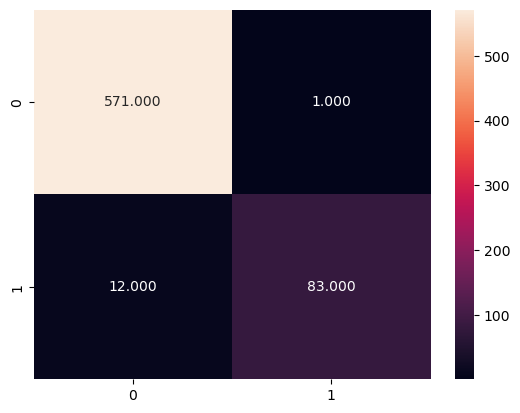

In [13]:
metrics_evaluation(xgb_model,X_train,X_test,y_train,y_test)

In [14]:
validation_evalution(xgb_model,'recall',X_train,y_train)

np.float64(0.8428571428571427)